# Financial Data Project 

In this data project exploratory data analysis of stock prices is focused on. This project is just meant to show visualization and pandas skills, it is not meant to be a robust financial analysis or be taken as financial advice.
____
We will focus on bank stocks and see how they progressed throughout the [financial crisis](https://en.wikipedia.org/wiki/Financial_crisis_of_2007%E2%80%9308) all the way to early 2016.

## Get the Data

In this section pandas is used to directly read data from Google finance

### The Imports

In [9]:
from pandas_datareader import data, wb
import fix_yahoo_finance as yf
yf.pdr_override()
import pandas as pd
import numpy as np
import datetime
%matplotlib inline

## Data

We need to get data using pandas datareader using yahoo finance. We will get stock information for the following banks:
*  Bank of America
* CitiGroup
* Goldman Sachs
* JPMorgan Chase
* Morgan Stanley
* Wells Fargo


In [2]:
start = datetime.datetime(2006, 1, 1)
end = datetime.datetime(2016, 1, 1)

In [10]:
BAC = data.get_data_yahoo('BAC', start, end)
C = data.get_data_yahoo('C', start, end)
GS = data.get_data_yahoo('GS', start, end)
JPM = data.get_data_yahoo('JPM', start, end)
MS = data.get_data_yahoo('MS', start, end)
WFC = data.get_data_yahoo('WFC', start, end)

[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded


In [11]:
BAC.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2006-01-03,46.919998,47.180000,46.150002,47.080002,36.147552,16296700
2006-01-04,47.000000,47.240002,46.450001,46.580002,35.763645,17757900
2006-01-05,46.580002,46.830002,46.320000,46.639999,35.809727,14970700
2006-01-06,46.799999,46.910000,46.349998,46.570000,35.755962,12599800
2006-01-09,46.720001,46.970001,46.360001,46.599998,35.779007,15619400


Create a list of the ticker symbols in alphabetical order.

In [12]:
tickers = ['BAC', 'C', 'GS', 'JPM', 'MS', 'WFC']

Concatenate the bank dataframes together to a single data frame called bank_stocks.

In [15]:
bank_stocks = pd.concat([BAC, C, GS, JPM, MS, WFC], axis=1, keys=tickers)

In [18]:
bank_stocks.columns.names = ['Bank Ticker','Stock Info']

In [19]:
bank_stocks.head()

Bank Ticker        BAC                                                        \
Stock Info        Open       High        Low      Close  Adj Close    Volume   
Date                                                                           
2006-01-03   46.919998  47.180000  46.150002  47.080002  36.147552  16296700   
2006-01-04   47.000000  47.240002  46.450001  46.580002  35.763645  17757900   
2006-01-05   46.580002  46.830002  46.320000  46.639999  35.809727  14970700   
2006-01-06   46.799999  46.910000  46.349998  46.570000  35.755962  12599800   
2006-01-09   46.720001  46.970001  46.360001  46.599998  35.779007  15619400   

Bank Ticker           C                                      ...         MS  \
Stock Info         Open        High         Low       Close  ...        Low   
Date                                                         ...              
2006-01-03   490.000000  493.799988  481.100006  492.899994  ...  56.740002   
2006-01-04   488.600006  491.000000  483.500000  483.799988  ...  58.349998   
2006-01-05   484.399994  487.799988  484.000000  486.200012  ...  58.020000   
2006-01-06   488.799988  489.000000  482.000000  486.200012  ...  58.049999   
2006-01-09   486.000000  487.399994  483.000000  483.899994  ...  58.619999   

Bank Ticker                                       WFC                        \
Stock Info       Close  Adj Close   Volume       Open       High        Low   
Date                                                                          
2006-01-03   58.310001  38.834549  5377000  31.600000  31.975000  31.195000   
2006-01-04   58.349998  38.861198  7977800  31.799999  31.820000  31.365000   
2006-01-05   58.509998  38.967754  5778000  31.500000  31.555000  31.309999   
2006-01-06   58.570000  39.007713  6889800  31.580000  31.775000  31.385000   
2006-01-09   59.189999  39.420616  4144500  31.674999  31.825001  31.555000   

Bank Ticker                                  
Stock Info       Close  Adj Close    Volume  
Date                                         
2006-01-03   31.900000  21.693670  11016400  
2006-01-04   31.530001  21.442055  10870000  
2006-01-05   31.495001  21.418251  10158000  
2006-01-06   31.680000  21.544062   8403800  
2006-01-09   31.674999  21.540665   5619600  

[5 rows x 36 columns]

# EDA

Max Close prices for each bank's stock throughout the time period

In [58]:
bank_stocks.xs(key='Close', axis=1, level='Stock Info').max()

Bank Ticker
BAC     54.900002
C      564.099976
GS     247.919998
JPM     70.080002
MS      89.300003
WFC     58.520000
dtype: float64

New empty DataFrame called returns. This dataframe will contain the returns for each bank's stock. returns are typically defined by:

$$r_t = \frac{p_t - p_{t-1}}{p_{t-1}} = \frac{p_t}{p_{t-1}} - 1$$

In [72]:
returns = pd.DataFrame()

We can use pandas pct_change() method on the Close column to represent this return value

In [74]:
for ticker in tickers:
    returns[ticker + ' Returns'] = bank_stocks.xs(key='Close', axis=1, level='Stock Info')[ticker].pct_change()

In [88]:
returns.head()

,BAC Returns,C Returns,GS Returns,JPM Returns,MS Returns,WFC Returns
Date,,,,,,
2006-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2006-01-04,-0.010620,-0.018462,-0.013812,-0.014183,0.000686,-0.011599
2006-01-05,0.001288,0.004961,-0.000393,0.003029,0.002742,-0.001110
2006-01-06,-0.001501,0.000000,0.014169,0.007046,0.001025,0.005874
2006-01-09,0.000644,-0.004731,0.012030,0.016242,0.010586,-0.000158


Create a pairplot of the returns dataframe

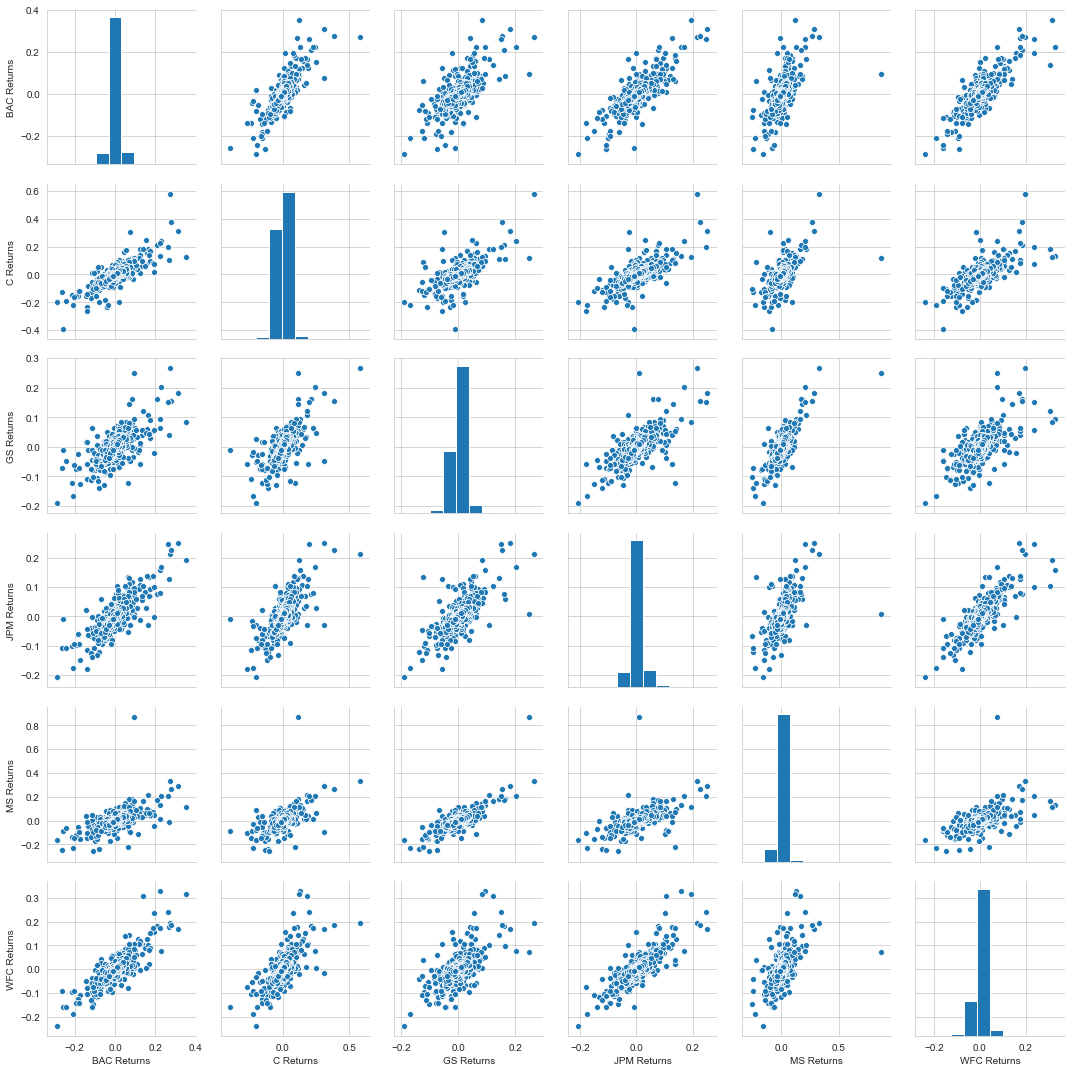

In [106]:
import seaborn as sns
sns.pairplot(returns[1:])

What dates each bank stock had the best and worst single day returns.

In [81]:
returns.idxmin()

BAC Returns   2009-01-20
C Returns     2009-02-27
GS Returns    2009-01-20
JPM Returns   2009-01-20
MS Returns    2008-10-09
WFC Returns   2009-01-20
dtype: datetime64[ns]

4 of the banks share the same day for the worst drop, when looked up this day happens to be Inauguration day

In [82]:
returns.idxmax()

BAC Returns   2009-04-09
C Returns     2008-11-24
GS Returns    2008-11-24
JPM Returns   2009-01-21
MS Returns    2008-10-13
WFC Returns   2008-07-16
dtype: datetime64[ns]

Take a look at the standard deviation of the returns in order to compare and classify riskiness (hihger standard deviation usually means more risky investment):

In [92]:
returns.std()

BAC Returns    0.036647
C Returns      0.038672
GS Returns     0.025390
JPM Returns    0.027667
MS Returns     0.037819
WFC Returns    0.030238
dtype: float64

Standard deviation of returns for the year 2015:

In [94]:
returns.loc['2015-01-01':'2015-12-31'].std()

BAC Returns    0.016163
C Returns      0.015289
GS Returns     0.014046
JPM Returns    0.014017
MS Returns     0.016249
WFC Returns    0.012591
dtype: float64

Create a distribution plot of the 2015 returns for Morgan Stanley

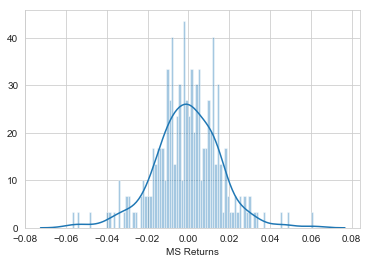

In [105]:
sns.distplot(returns.loc['2015-01-01':'2015-12-31']['MS Returns'], bins=100)

Create a distplot of the 2008 returns for CitiGroup

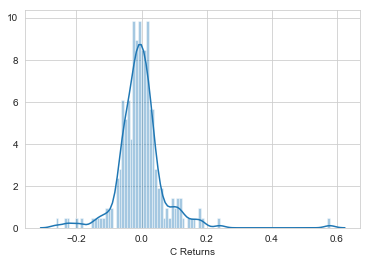

In [104]:
sns.distplot(returns.loc['2008-01-01':'2008-12-31']['C Returns'], bins=100)

____
# More Visualization

A lot of this project focuses on visualizations of data.

### Imports

In [115]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

Line plot showing Close price for each bank for the entire index of time.

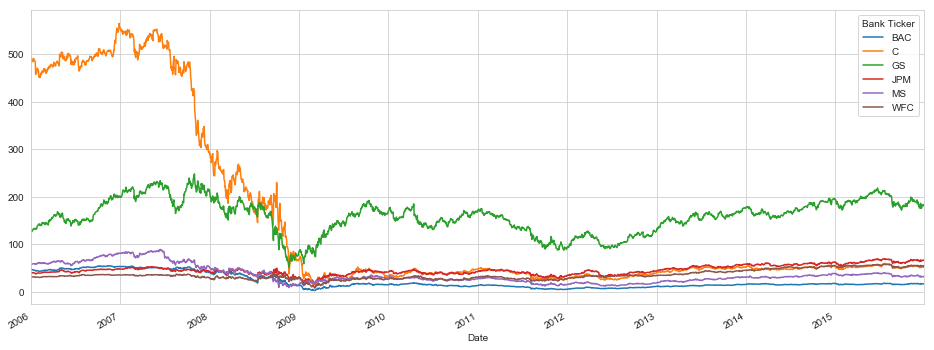

In [116]:
bank_stocks.xs(key='Close',axis=1,level='Stock Info').plot(figsize=(16,6))

## Moving Averages

Let's analyze the moving averages for these stocks in the year 2008. 

Plot the rolling 30 day average against the Close Price for Bank Of America's stock for the year 2008:

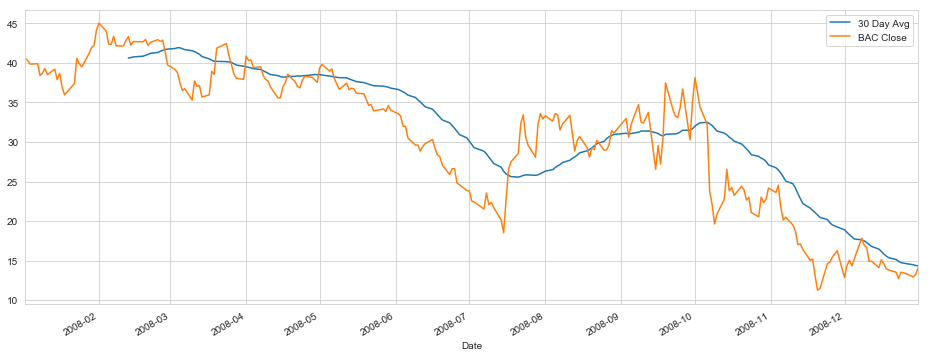

In [117]:
plt.figure(figsize=(16,6))
BAC['Close'].loc['2008-01-01':'2009-01-01'].rolling(window=30).mean().plot(label='30 Day Avg')
BAC['Close'].loc['2008-01-01':'2009-01-01'].plot(label='BAC Close')
plt.legend()

Heatmap of the correlation between the stocks Close Price

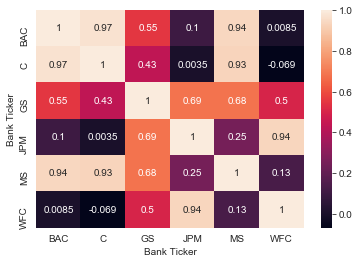

In [120]:
correlation = bank_stocks.xs(key='Close',axis=1,level='Stock Info').corr()
sns.heatmap(correlation, annot=True)

Clustermap to cluster the correlations together

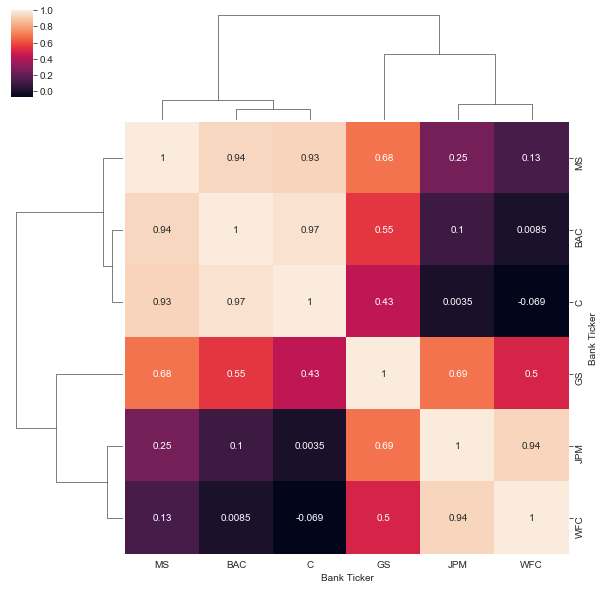

In [121]:
sns.clustermap(correlation, annot=True)